## Student performance measurement

Project cycle:
 - problem statement
 - Data Collection
 - data analysis
 - exploratory data analysis
 - preprocessing
 - model training
 - model evaluation


### 1) Problem statement :
**this project is basically about how the student's performance is affected by the crossponding variables such as gender,
age and etc.**

### 2) Data Collection :

- Dataset source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetld=74977
- The dataset consists of 8 columns and 1000 rows

### 2.1 Import data 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the csv file 
df = pd.read_csv('data/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

#### Data Analysis :
- missing values
- duplicate values
- check data type
- unique values
- data description
- categorical data 

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

**super no missing values are in the data**

In [6]:
#checking duplicate values
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
uni_loe = df['parental level of education'].nunique()
uni_loe

6

In [11]:
# print("categories in 'gender' variable :   ", end= " ")
# print(df['gender'].unique())
# print("categories in 'race/ethnicity' variable :   ", end= " ")
# print(df['race/ethnicity'].unique())
# print("categories in 'lunch' variable :   ", end= " ")
# print(df['lunch'].unique())
# print("categories in 'parental level of education	' variable :   ", end= " ")
# print(df['parental level of education'].unique())
# print("categories in 'test preparation course' variable :   ", end= " ")
# print(df['test preparation course'].unique())

In [12]:
categorical_col =['gender', 'race/ethnicity', 'lunch', 'parental level of education', 'test preparation course']
for col in categorical_col:
    print(f"categories in {col} variable :   ", end= " ")
    print(df[col].unique())

categories in gender variable :    ['female' 'male']
categories in race/ethnicity variable :    ['group B' 'group C' 'group A' 'group D' 'group E']
categories in lunch variable :    ['standard' 'free/reduced']
categories in parental level of education variable :    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in test preparation course variable :    ['none' 'completed']


In [13]:
num_col =[ col for col in df.columns if df[col].dtype != 'O']
print("we have total {} numerical values and they are {}".format(len(num_col), num_col))

we have total 3 numerical values and they are ['math score', 'reading score', 'writing score']


In [15]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insights :
- we can conclude that all the mean values are near to each other 
- and all std are also close to each other
- it suggests that the features in your dataset have similar scales and distributions
- Machine learning models often perform better when the input features are on a similar scale

### 2.2 Feature engineering

- now i am going to add total values (which is the sum of math, reading and writing)
- also i am goint to add average values

In [16]:
df['total']= df['reading score'] + df['math score'] + df['writing score']
df['average'] = df ['total']/3

In [17]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [23]:
    
reading_full=df[df['reading score'] == 100] ['average'].count()
writing_full=df[df['writing score'] == 100] ['average'].count()
math_full=df[df['math score'] == 100] ['average'].count()

print(f"no of students with full marks in reading : {reading_full}")
print(f"no of students with full marks in writing : {writing_full}")
print(f"no of students with full marks in math : {math_full}")



no of students with full marks in reading : 17
no of students with full marks in writing : 14
no of students with full marks in math : 7


In [24]:
reading_less=df[df['reading score'] <= 20] ['average'].count()
writing_less=df[df['writing score'] <= 20] ['average'].count()
math_less=df[df['math score'] <= 20] ['average'].count()

print(f"no of students with less than 20 marks in reading : {reading_less}")
print(f"no of students with  less than 20 marks in writing : {writing_less}")
print(f"no of students with  less than 20 marks in math : {math_less}")

no of students with less than 20 marks in reading : 1
no of students with  less than 20 marks in writing : 3
no of students with  less than 20 marks in math : 4


### 4. Data Visualization
- 4.1 Histogram and KDE

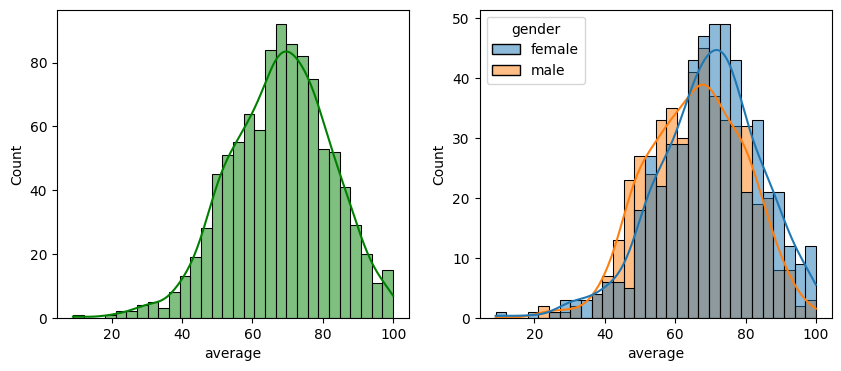

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', bins=30, hue='gender', kde=True)
plt.show()

- from the above chart we can see that the performance of famale is comperatively high

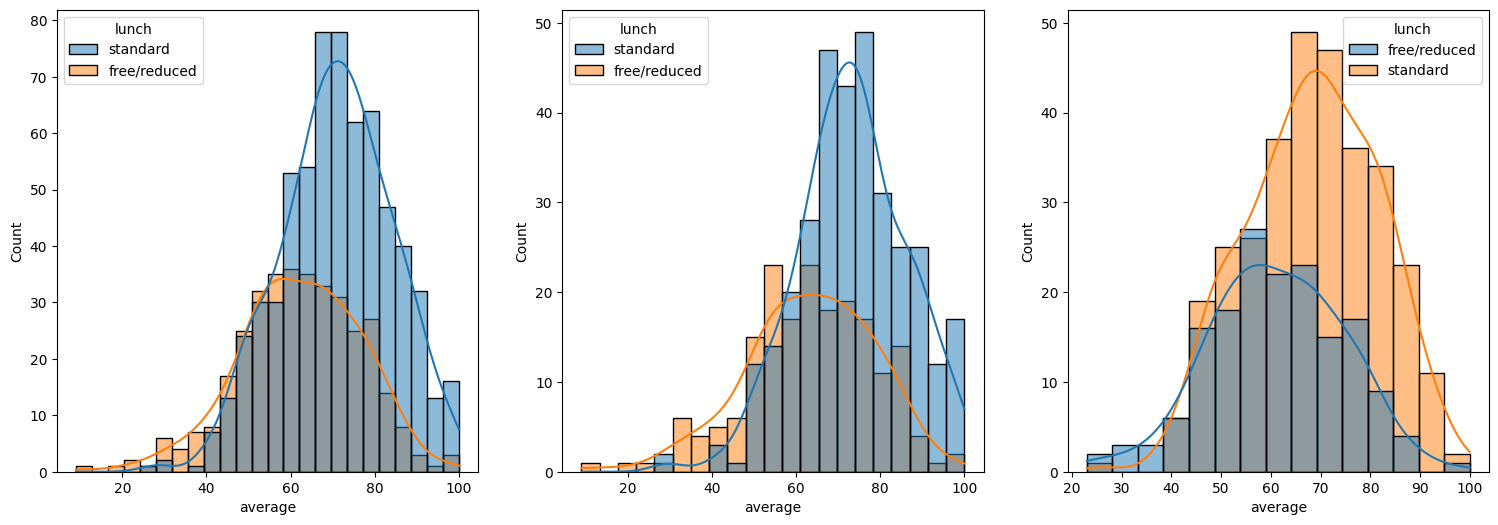

In [30]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

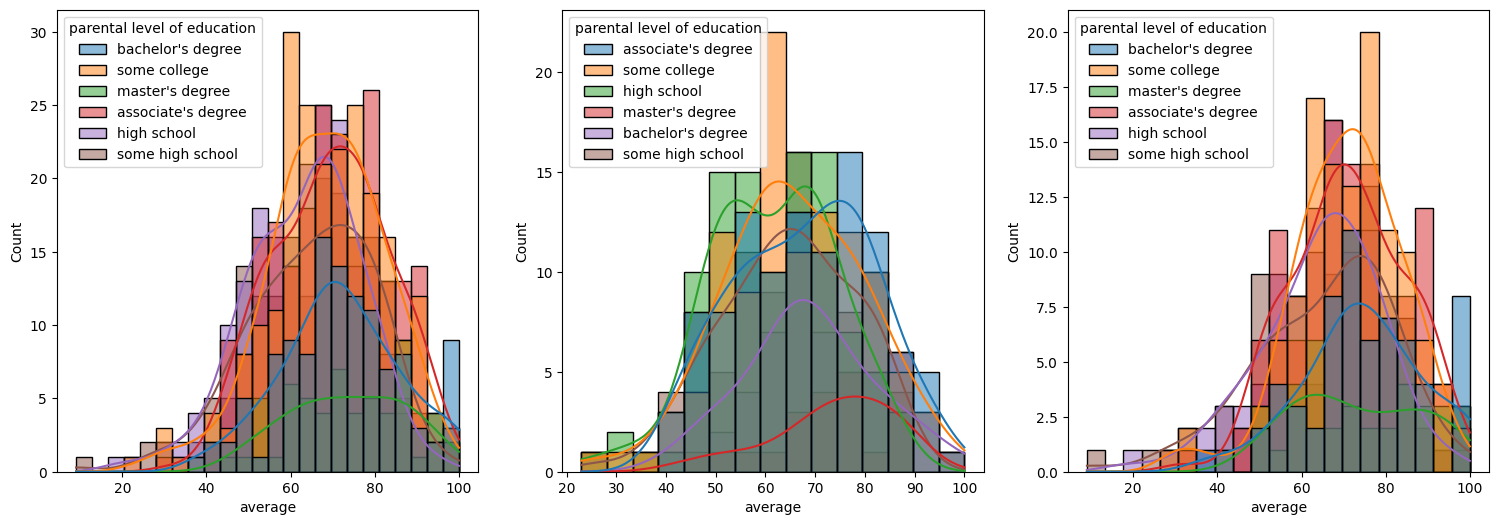

In [31]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()


- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

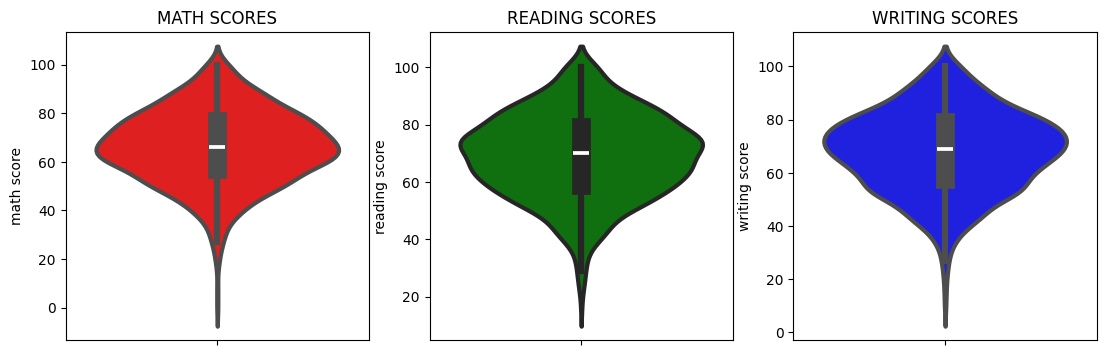

In [34]:
plt.figure(figsize=(18,4))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

### Univerient analysis

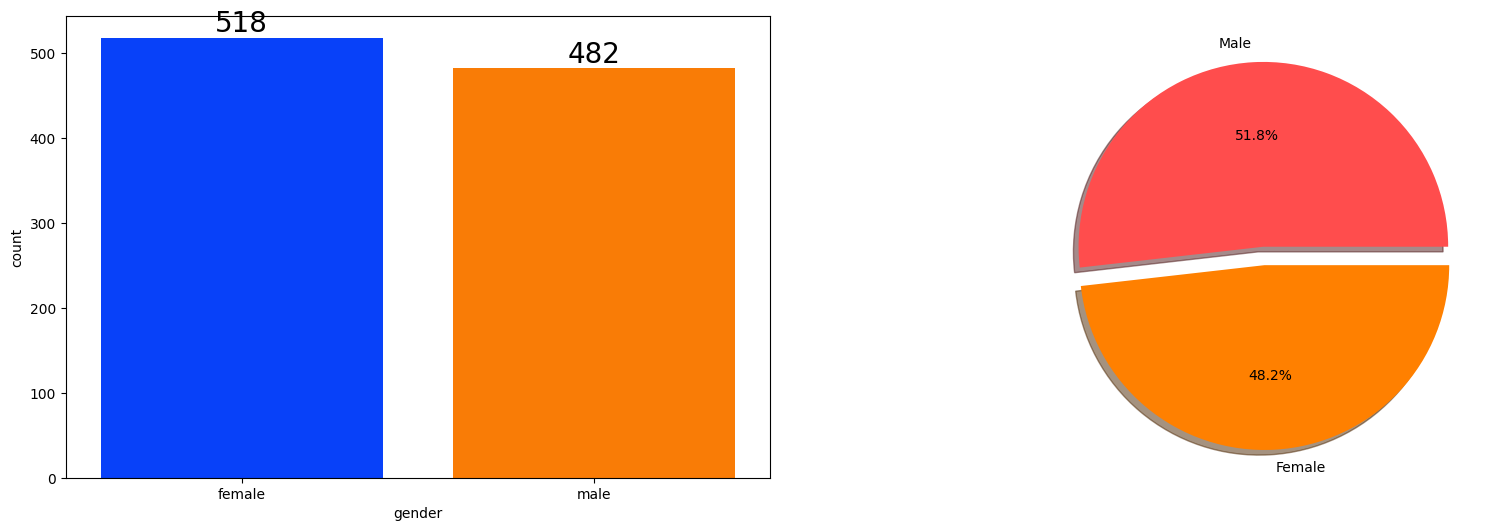

In [41]:
f,ax=plt.subplots(1,2,figsize=(20,6))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

- it shows that gender data has balanced dataset

### Bivarient analysis

In [45]:
gender_group = df.groupby('gender')
gender_group.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
5,female,group B,associate's degree,standard,none,71,83,78,232,77.333333
6,female,group B,some college,standard,completed,88,95,92,275,91.666667
7,male,group B,some college,free/reduced,none,40,43,39,122,40.666667
8,male,group D,high school,free/reduced,completed,64,64,67,195,65.000000
10,male,group C,associate's degree,standard,none,58,54,52,164,54.666667
